In [254]:
import re

import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [255]:
DATA_PATH = 'C:/Users/Data/names/'

***Получение данных из всех источников***

In [256]:
def get_all_data_by_years(years_list, groub_by):
    names_by_year = {}
    cols = ['Name', 'Gender', 'Count']
    for year in years_list:
        names_by_year[year] = pd.read_csv(
            '{}yob{}.txt'.format(DATA_PATH, str(year)),
            names = cols
        )
    return pd.concat(names_by_year, names = ['Year', 'Pos'])\
            .groupby(groub_by)\
            .sum()

***Функция для построения различных графиков***

In [257]:
def plot_the_figure_by_data(data,
                            kind_of_figure='line', 
                            size=(15, 7), 
                            axis_y='Count',
                            axis_x=None,
                            rotating=50):
    data.plot(kind = kind_of_figure,
                figsize = size,
                grid = True,
                rot = rotating,
                y = axis_y,
                x = axis_x)

***Построение графика по именам за период***

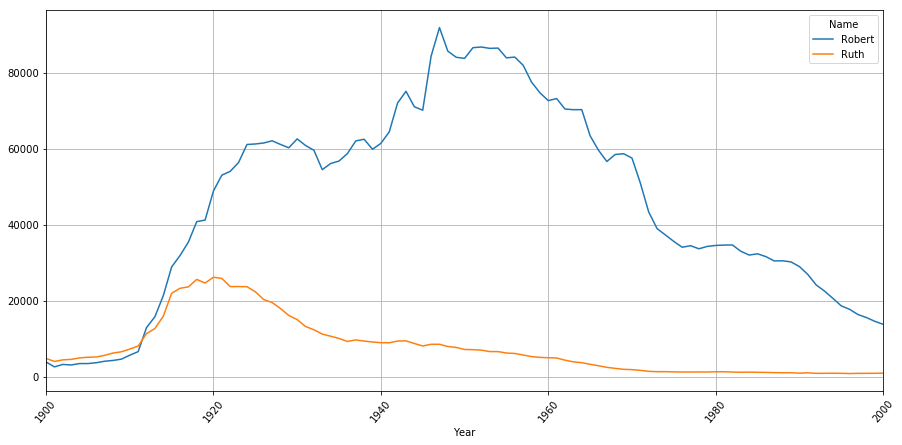

In [258]:
query_names = ['Ruth', 'Robert']
plot_the_figure_by_data(get_all_data_by_years(range(1900, 2001), ['Year', 'Name'])\
                                            .query('Name == {}'.format(query_names))\
                                            .unstack('Name'))

***Построение гистограммы по именам за период***

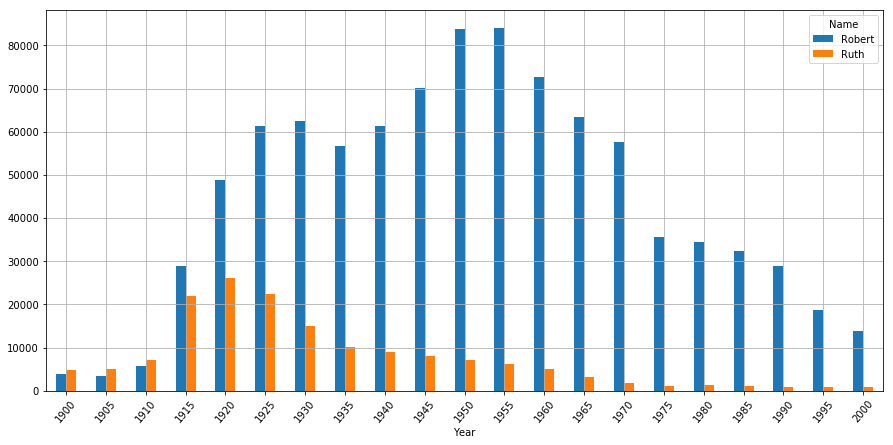

In [259]:
plot_the_figure_by_data(get_all_data_by_years(range(1900, 2001, 5), ['Year', 'Name'])\
                                            .query('Name == {}'.format(query_names))\
                                            .unstack('Name'), 
                        'bar')

***Функция поиска ТОП-имен за период***

In [260]:
def get_top_names_for_period(years_list, first_letter='', top_value=None):
    names = get_all_data_by_years(years_list, ['Name'])
    names_starts_with_the_letter = [name for name in names.to_dict()['Count'] if re.search('^{}'.format(first_letter), name)]
    count_names = names\
            .query('Name == {}'.format(names_starts_with_the_letter))\
            .sort_values(
                by='Count',
                ascending=False
            )\
            .head(top_value).to_dict()
    return [name for name in count_names['Count']]

***Построение круговой диаграммы ТОП10 имен на букву R за период***

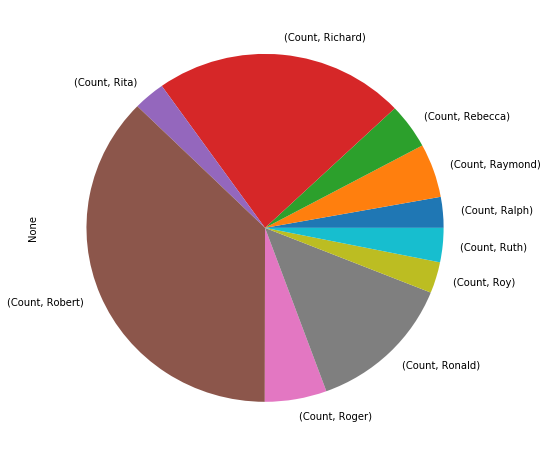

In [261]:
query_names =  get_top_names_for_period(years_list, 'R', 10)
all_names_by_period = get_all_data_by_years([1950], ['Name'])\
                                            .query('Name == {}'.format(query_names))\
                                            .unstack('Name')
plot_the_figure_by_data(all_names_by_period, 
                        'pie', 
                        (8,8))

***Функция поиска согласных в слове***

In [262]:
def get_number_of_consonants(all_names_by_period):
    vowels = set("aeiouy")
    list_with_number_of_cons = []
    for name in all_names_by_period.to_dict()['Count']:
        number_of_cons = 0
        for letter in name.lower():
            if letter not in vowels:
               number_of_cons += 1
        list_with_number_of_cons.append(number_of_cons) 
    all_names_by_period['Cons'] = list_with_number_of_cons
    return all_names_by_period

***Построение пузырьковой диаграммы***

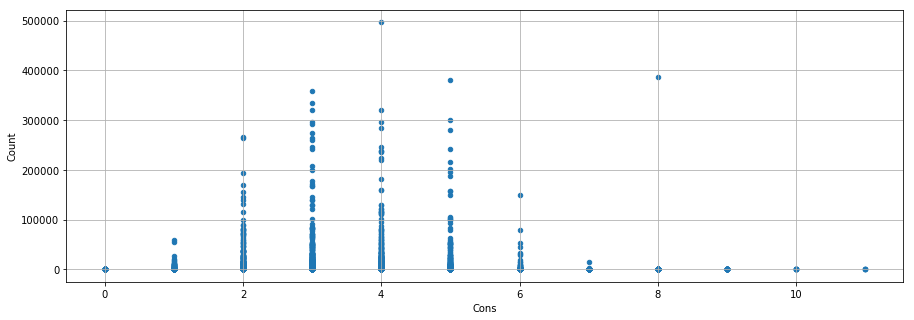

In [263]:
all_names_by_period = get_all_data_by_years(range(1990, 2001), ['Name'])
plot_the_figure_by_data(get_number_of_consonants(all_names_by_period),
                        'scatter',
                        size=(15, 5),
                        axis_y='Count', 
                        axis_x='Cons', 
                        rotating=0)